# Deep Learning (AI5100): Assignment-4
### Topic: Autoencoders and Variational Autoencoder (VAE)
### Roll Number: CS23MTECH14003
### Name: Hrishikesh Hemke

Q1] Autoencoders: In this task, consider the MNIST dataset for training autoencoder models (with
a suitable regularization) with hidden (latent) dimension of 32, and 64. \
(a) Report the train and test reconstruction errors for the three models (display about 10 reconstructions from the train and test data each) \
(b) Perform the reconstruction on the line joining two training data samples in the hidden space.
Consider at least 5 pairs of samples.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
# Download MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 11951003.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 346085.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:49<00:00, 33253.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17655726.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Define Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, hidden_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
# Function to train autoencoder model
def train_autoencoder(model, criterion, optimizer, train_loader, num_epochs=10):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"=====>Epoch: {epoch+1}     Average Loss: {running_loss / len(train_loader)}")

In [5]:
# Function to evaluate reconstruction error
def evaluate_reconstruction(model, dataloader):
    criterion = nn.MSELoss()
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for data in dataloader:
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    return avg_loss

In [6]:
def display_reconstructions(model, dataloader, num_images=10):
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            inputs = inputs.numpy()
            outputs = outputs.numpy()
            print("\n 10 reconstructions from the train and test are respectively")
            for j in range(num_images):
                plt.subplot(2, num_images, j+1)
                plt.imshow(inputs[j].reshape(28, 28), cmap='gray')
                plt.axis('off')
            for j in range(num_images):
                plt.subplot(2, num_images, j+1+num_images)
                plt.imshow(outputs[j].reshape(28, 28), cmap='gray')
                plt.axis('off')
            plt.show()
            break

In [7]:
# hidden_dims = [16,32, 64]
# for dim in hidden_dims:
def train_autoencoder_with_dims(dim):
      model = Autoencoder(dim)
      criterion = nn.MSELoss()
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      train_autoencoder(model, criterion, optimizer, train_loader)
      train_loss = evaluate_reconstruction(model, train_loader)
      test_loss = evaluate_reconstruction(model, test_loader)
      print(f"\n Hidden Dimension: {dim}, Train Loss: {train_loss}, Test Loss: {test_loss}")
      display_reconstructions(model, test_loader)

First model with hidden(latent) dimension as 16

=====>Epoch: 1     Average Loss: 0.049313351944851466
=====>Epoch: 2     Average Loss: 0.02381942578470275
=====>Epoch: 3     Average Loss: 0.019329831548241663
=====>Epoch: 4     Average Loss: 0.017505210951399574
=====>Epoch: 5     Average Loss: 0.016520300341932886
=====>Epoch: 6     Average Loss: 0.0158251640674815
=====>Epoch: 7     Average Loss: 0.015266313795437183
=====>Epoch: 8     Average Loss: 0.014825587005995865
=====>Epoch: 9     Average Loss: 0.014452821384471999
=====>Epoch: 10     Average Loss: 0.014130466659344844

 Hidden Dimension: 16, Train Loss: 0.013877828035559227, Test Loss: 0.013675364901464952

 10 reconstructions from the train and test are respectively


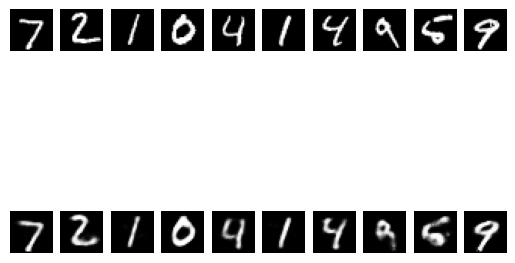

In [13]:
# Train autoencoder models with latent dimension = 16
train_autoencoder_with_dims(16)

Second model with hidden(latent) dimension as 32

=====>Epoch: 1     Average Loss: 0.04696646615513352
=====>Epoch: 2     Average Loss: 0.019456737704559177
=====>Epoch: 3     Average Loss: 0.014170901728734406
=====>Epoch: 4     Average Loss: 0.011906616494996842
=====>Epoch: 5     Average Loss: 0.010660517603349583
=====>Epoch: 6     Average Loss: 0.009722841534215505
=====>Epoch: 7     Average Loss: 0.009048659122114116
=====>Epoch: 8     Average Loss: 0.008593388915514704
=====>Epoch: 9     Average Loss: 0.008261158970047606
=====>Epoch: 10     Average Loss: 0.007981641282603494

 Hidden Dimension: 32, Train Loss: 0.007821040341197683, Test Loss: 0.007656359785719763

 10 reconstructions from the train and test are respectively


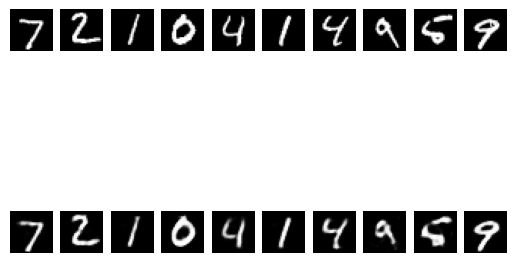

In [14]:
# Train autoencoder models with latent dimension = 32
train_autoencoder_with_dims(32)

Third model with hidden(latent) dimension as 64

=====>Epoch: 1     Average Loss: 0.04602488875389099
=====>Epoch: 2     Average Loss: 0.01860933112643802
=====>Epoch: 3     Average Loss: 0.01382478721527212
=====>Epoch: 4     Average Loss: 0.01137341055741061
=====>Epoch: 5     Average Loss: 0.009831761309841295
=====>Epoch: 6     Average Loss: 0.008678824375711207
=====>Epoch: 7     Average Loss: 0.007817927244574085
=====>Epoch: 8     Average Loss: 0.007171275503218555
=====>Epoch: 9     Average Loss: 0.006654138433566289
=====>Epoch: 10     Average Loss: 0.00625637777820865

 Hidden Dimension: 64, Train Loss: 0.006040358408562728, Test Loss: 0.00591258522818643

 10 reconstructions from the train and test are respectively


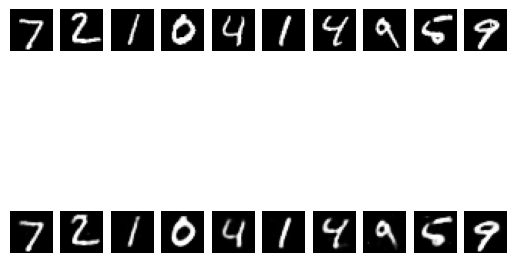

In [15]:
# Train autoencoder models with latent dimension = 64
train_autoencoder_with_dims(64)

In [10]:
# Perform reconstruction in hidden space
def interpolate_samples(model, sample1, sample2, steps=10):
    latent1 = model.encoder(sample1.view(1, -1))
    latent2 = model.encoder(sample2.view(1, -1))
    interpolations = []
    with torch.no_grad():
        for i in range(steps):
            alpha = i / (steps - 1)
            interpolated_latent = (1 - alpha) * latent1 + alpha * latent2
            reconstructed = model.decoder(interpolated_latent)
            interpolations.append(reconstructed.view(28, 28))
    return interpolations

The reconstruction on the line joining two training data samples in the hidden space.


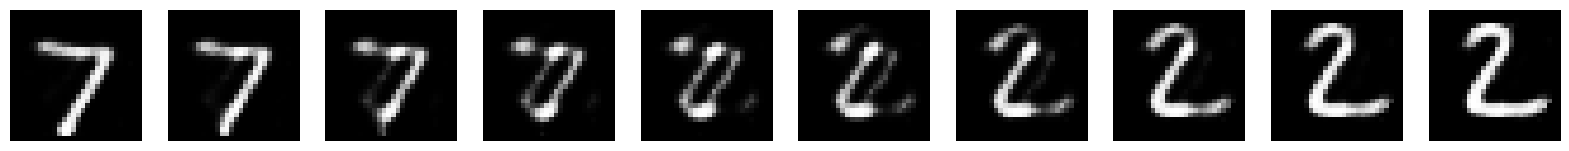

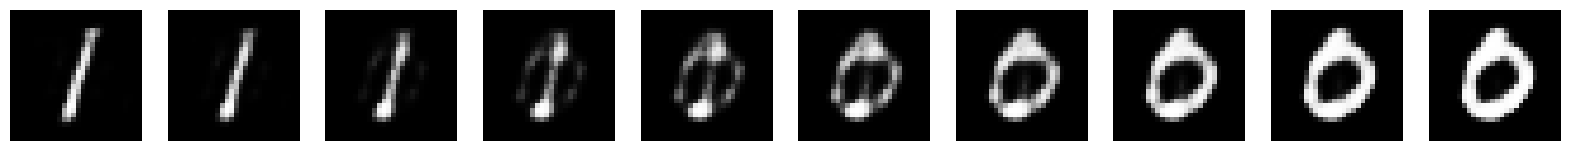

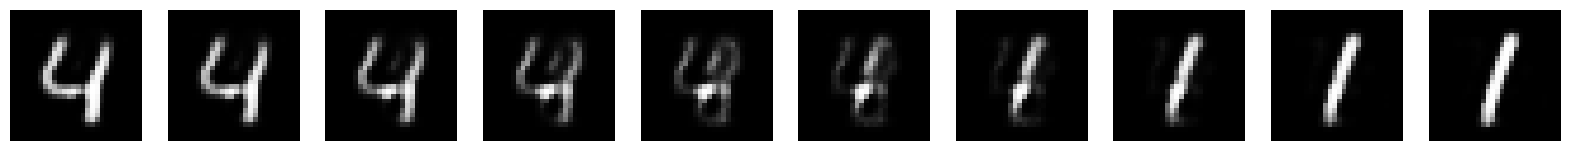

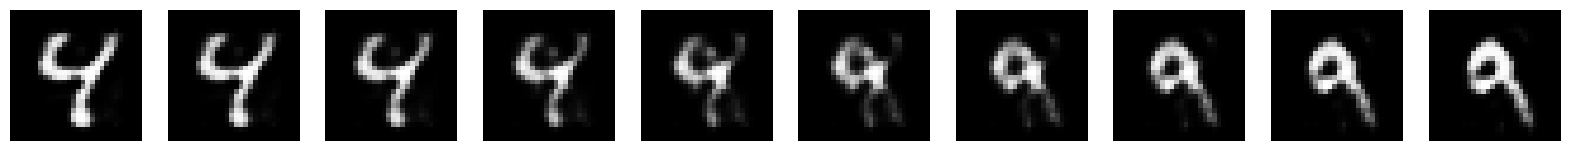

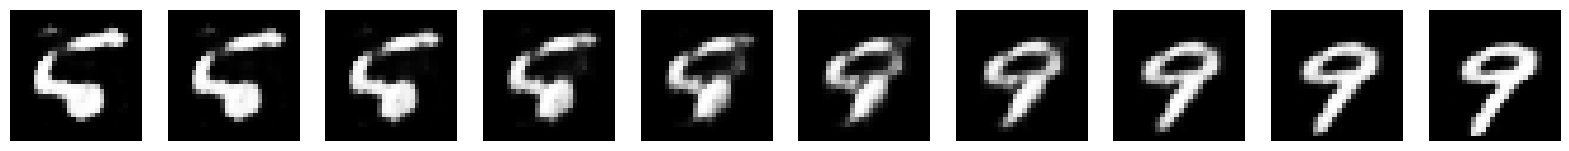

In [11]:
# Select sample pairs for interpolation
sample_pairs = [(test_set[i][0], test_set[i+1][0]) for i in range(0, 10, 2)]
for pair in sample_pairs:
    interpolations = interpolate_samples(model, pair[0], pair[1])
    plt.figure(figsize=(20, 2))
    for i, interpolation in enumerate(interpolations):
        plt.subplot(1, len(interpolations), i + 1)
        plt.imshow(interpolation, cmap='gray')
        plt.axis('off')
    plt.show()

Q2] Variational Autoencoder (VAE): Train a VAE (on MNIST dataset) for the tasks of generating MNIST-like digits. Encoder learns a distribution in 16D space. After successfully training the VAE, generate 64 images and display. [15 Marks]

In [16]:
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc31 = nn.Linear(h_dim2, z_dim)
        self.fc32 = nn.Linear(h_dim2, z_dim)
        # decoder part
        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)

    def encoder(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc31(h), self.fc32(h) # mu, log_var

    def sampling(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu) # return z sample

    def decoder(self, z):
        h = F.relu(self.fc4(z))
        h = F.relu(self.fc5(h))
        return F.sigmoid(self.fc6(h))

    def forward(self, x):
        mu, log_var = self.encoder(x.view(-1, 784))
        z = self.sampling(mu, log_var)
        return self.decoder(z), mu, log_var

# build model
vae = VAE(x_dim=784, h_dim1= 512, h_dim2=256, z_dim=16)
if torch.cuda.is_available():
    vae.cuda()

In [17]:
vae

VAE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc31): Linear(in_features=256, out_features=16, bias=True)
  (fc32): Linear(in_features=256, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=784, bias=True)
)

In [18]:
optimizer = optim.Adam(vae.parameters())
# return reconstruction error + KL divergence losses
def loss_function(recon_x, x, mu, log_var):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

In [19]:
def train(epoch):
    vae.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.cuda()
        optimizer.zero_grad()

        recon_batch, mu, log_var = vae(data)
        loss = loss_function(recon_batch, data, mu, log_var)

        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print('=====> Epoch: {}    Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))


In [20]:
def test():
    vae.eval()
    test_loss= 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.cuda()
            recon, mu, log_var = vae(data)

            # sum up batch loss
            test_loss += loss_function(recon, data, mu, log_var).item()

    test_loss /= len(test_loader.dataset)
    print('=====> Test set loss: {:.4f}'.format(test_loss))

In [21]:
for epoch in range(1, 11):
    train(epoch)
    test()

=====> Epoch: 1    Average loss: 173.7422
=====> Test set loss: 134.0660
=====> Epoch: 2    Average loss: 126.3440
=====> Test set loss: 119.0766
=====> Epoch: 3    Average loss: 116.7681
=====> Test set loss: 112.9991
=====> Epoch: 4    Average loss: 112.1527
=====> Test set loss: 109.8974
=====> Epoch: 5    Average loss: 109.6716
=====> Test set loss: 108.6481
=====> Epoch: 6    Average loss: 107.8765
=====> Test set loss: 106.5876
=====> Epoch: 7    Average loss: 106.3777
=====> Test set loss: 105.4606
=====> Epoch: 8    Average loss: 105.2883
=====> Test set loss: 104.5878
=====> Epoch: 9    Average loss: 104.3433
=====> Test set loss: 104.0015
=====> Epoch: 10    Average loss: 103.6137
=====> Test set loss: 103.4045


Generating 64 images after training

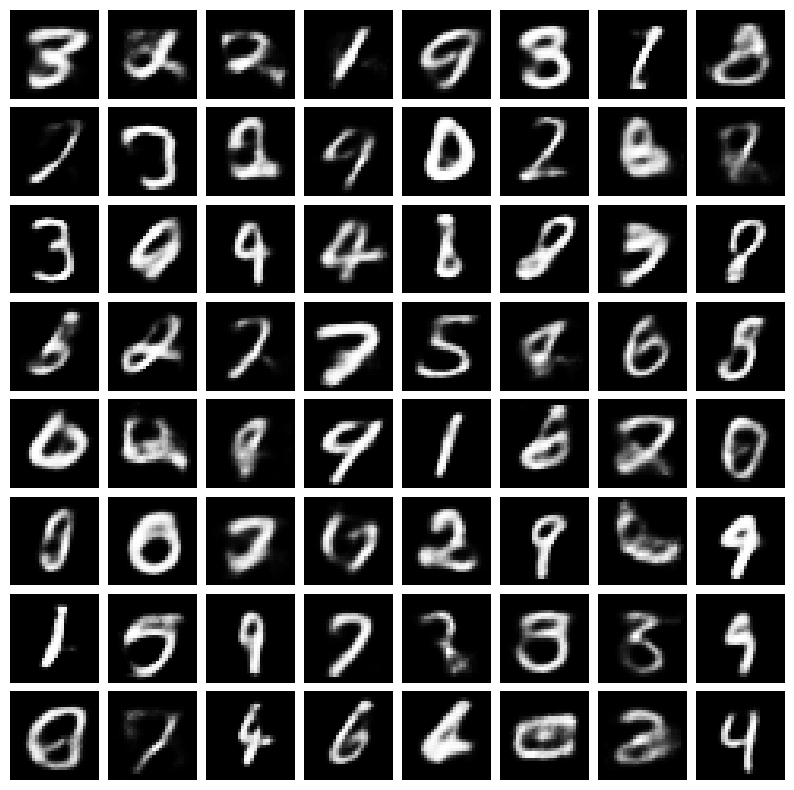

In [22]:
with torch.no_grad():
    z = torch.randn(64, 16).cuda()
    sample = vae.decoder(z).cuda()
    # Reshape the sample tensor into a 8x8 grid
    sample_grid = sample.view(8, 8, 28, 28).cpu()
    # Plot the 8x8 grid of images
    fig, axes = plt.subplots(8, 8, figsize=(10, 10))
    for i in range(8):
        for j in range(8):
            ax = axes[i, j]
            ax.imshow(sample_grid[i, j].numpy().squeeze(), cmap='gray')
            ax.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

# Observations

Reconstruction done with latent dimension 64 give the best results among the latent dimension 16,32,64